In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If you want to clear outputs for a "fresh look", go to Edit and hit "clear outputs"
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
 
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import * #-- to check Even010 via RE and NFA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help

# Total points are 150. This helps us avoid wierd fractional points for each part below. Finally we will scale it to 100.

# Also the material almost entirely depends on 06_RE/RegLang_Tutorial.ipynb . 

# This assignment is __deliberately__ kept instruction-free but we expect a certain number of steps to be carefully used. In particular:

## To obtain NFA from RE, Getting DFA from NFA, minimizing DFA, operations on DFA (union, intersection, complementation, reversal), you must know which functions do this (use help(function) printout if you like). All Jove functions are also nicely listed in the Appendix of our book - with examples of use also mentioned there! Also DFA can be turned into an NFA and a GNFA.

## You know that you can't directly complement an RE, etc. But we expect you not to guess the steps but use the aforesaid steps to actually get it done

## To put strings together, you can do this: "(" + s + ")*" embeds a string "s" in parentheses and stars the whole. so if "s" were to be "(a+b)" before, you now get "((a+b))*".

## The steps will vary. Avoid hugely nested one-liners entirely. Here is a good solution.

## * Starting_RE = "...a string..."

## * NFA_from_RE = conversion of above to NFA

## * DFA_for_RE = conversion of above NFA to DFA

# Don't write it as f(g(h(i(j(args, args), args)))) as it is hard to grade


# Question 1: Obtain the DFA of Question-2 more systematically.

## 1a (5 pts): Write down an important piece of our desired language as a regular expression

$L_{010}$ = $    \{0,1\}^* \{010\}\{0,1\}^*  $

# SOLUTION CELLS FOLLOW

In [2]:
L010 =  "(0+1)*010(0+1)*" #-- "...fill the regexp for L_010 above  here " 

## 1b (20 pts): We recall that $L_{010}$ had to be complemented in Asg2's DFA. Unfortunately, our RE language does not include complements. Your task is to pay attention to lectures Lec7 on and find a way to obtain a regular expression for $ LC_{010} = \overline {  \{0,1\}^* \{010\}\{0,1\}^*  } $. The steps are up to you to design.




# SOLUTION CELLS FOLLOW

In [3]:
comp_mindfa_L010 = comp_dfa(min_dfa(nfa2dfa(re2nfa( L010)))) # -- steps with documentation

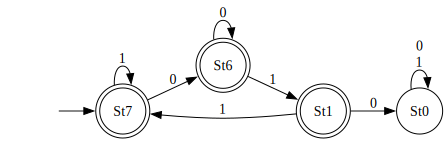

In [4]:
dotObj_dfa(comp_mindfa_L010, FuseEdges=True)

In [5]:
comp_mindfa_L010_nfa = dfa2nfa(comp_mindfa_L010)

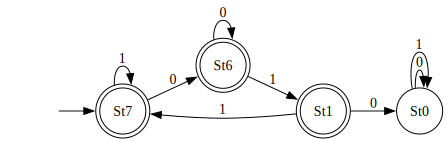

In [6]:
dotObj_nfa(comp_mindfa_L010_nfa)

In [7]:
comp_mindfa_L010_gnfa = mk_gnfa(comp_mindfa_L010_nfa) # -- steps with documentation (add as many)

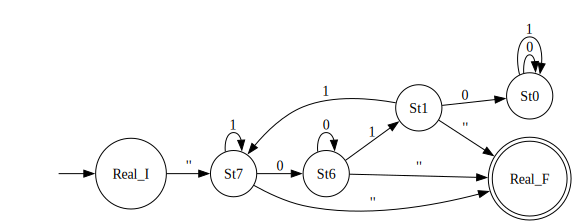

In [8]:
dotObj_gnfa(comp_mindfa_L010_gnfa)

In [9]:
(gnfa_final_comp_L010,do,RE_comp_L010) = del_gnfa_states(comp_mindfa_L010_gnfa)

**** Eliminating state St0 ****
**** Eliminating state St1 ****
**** Eliminating state St7 ****
**** Eliminating state St6 ****


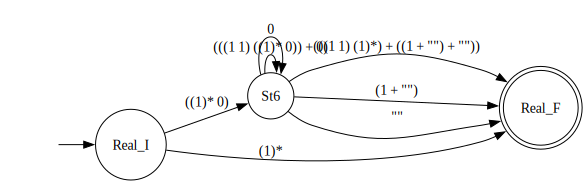

In [10]:
do[3]

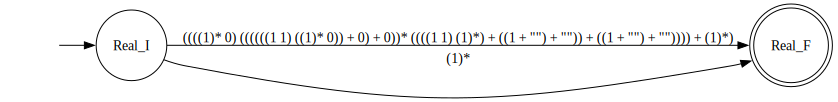

In [11]:
do[4]

In [12]:
RE_comp_L010

'(((((1)* 0) ((((((1 1) ((1)* 0)) + 0) + 0))* ((((1 1) (1)*) + ((1 + "") + "")) + ((1 + "") + "")))) + (1)*) + (1)*)'

In [13]:
check = min_dfa(nfa2dfa(re2nfa(RE_comp_L010)))

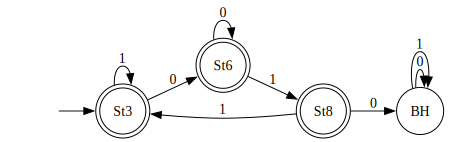

In [14]:
dotObj_dfa_w_bh(check)

In [15]:
L_RE = "( " + RE_comp_L010 + "(010)" + RE_comp_L010 + "(010)" + " )*"

In [16]:
L_RE

'( (((((1)* 0) ((((((1 1) ((1)* 0)) + 0) + 0))* ((((1 1) (1)*) + ((1 + "") + "")) + ((1 + "") + "")))) + (1)*) + (1)*)(010)(((((1)* 0) ((((((1 1) ((1)* 0)) + 0) + 0))* ((((1 1) (1)*) + ((1 + "") + "")) + ((1 + "") + "")))) + (1)*) + (1)*)(010) )*'

# 1c (10 pts): Verify that LC010 is right. Hint: reobtain a minimal DFA and establish isomorphism with a minimal complement DFA in an earlier stage for $LC_{010}$.

Verification done above!!

# SOLUTION CELLS FOLLOW

# 1d (5 pts): Now fill in all the steps needed to write out the RE for $ L =   ( \;\; \overline {\{0,1\}^* \; \{010\}\; \{0,1\}^* }\;\; (010) \;\; \overline {\{0,1\}^* \{010\}\{0,1\}^*} \;\; (010)\;\; )*  $

# SOLUTION CELLS FOLLOW

L_RE obtained above

# 1e (20 pts): Now finish all the steps to write out the correct DFA for $L$. Call it Correct010DFA

In [17]:
Correct010DFA=min_dfa(nfa2dfa(re2nfa(L_RE)))
nfa2dfa(re2nfa(L_RE))

{'Q': {'St0',
  'St1',
  'St10',
  'St11',
  'St12',
  'St13',
  'St14',
  'St15',
  'St16',
  'St17',
  'St18',
  'St19',
  'St2',
  'St20',
  'St21',
  'St22',
  'St23',
  'St24',
  'St25',
  'St26',
  'St27',
  'St28',
  'St29',
  'St3',
  'St30',
  'St31',
  'St32',
  'St33',
  'St34',
  'St35',
  'St36',
  'St37',
  'St38',
  'St39',
  'St4',
  'St40',
  'St41',
  'St42',
  'St43',
  'St44',
  'St45',
  'St46',
  'St47',
  'St48',
  'St49',
  'St5',
  'St50',
  'St51',
  'St52',
  'St53',
  'St54',
  'St55',
  'St56',
  'St57',
  'St58',
  'St59',
  'St6',
  'St60',
  'St61',
  'St62',
  'St63',
  'St64',
  'St65',
  'St66',
  'St67',
  'St68',
  'St69',
  'St7',
  'St70',
  'St71',
  'St72',
  'St73',
  'St74',
  'St75',
  'St76',
  'St77',
  'St78',
  'St79',
  'St8',
  'St80',
  'St81',
  'St82',
  'St83',
  'St84',
  'St85',
  'St86',
  'St87',
  'St88',
  'St89',
  'St9'},
 'Sigma': {'0', '1'},
 'Delta': {('St36', '0'): 'St68',
  ('St36', '1'): 'St30',
  ('St68', '0'): 'St60'

In [18]:
Correct010DFA["F"]

{'St10', 'St11', 'St12', 'St13', 'St34', 'St35', 'St36'}

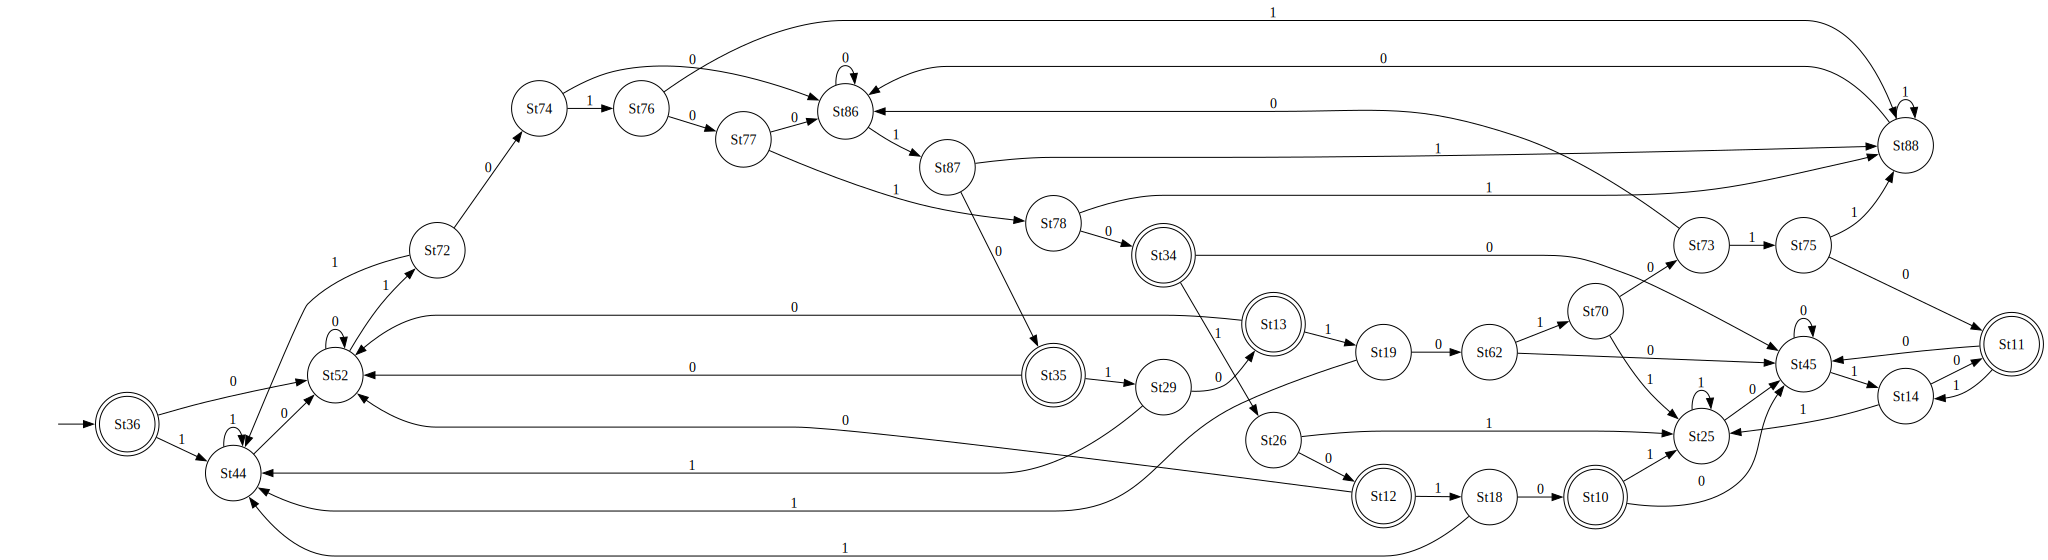

In [19]:
dotObj_dfa(Correct010DFA)

In [20]:
len(Correct010DFA["Q"])

28

In [21]:
mc=min_dfa(Correct010DFA)

In [22]:
len(mc["Q"])

28

# SOLUTION CELLS FOLLOW

In [23]:
#Correct010DFA = # --- the DFA is assigned to this variable

# 1f(10 pts): Run __seven__ MustPass and __three__ MustFail tests through Correct101DFA. 

## Your tests must include these MustPass  (add one more to make seven). Blanks added for readability only! There are seven final states, so the full list of seven test strings __must hit each of the seven final states!__ . A few extra ones from your side are OK; mark them as "extra ones".


### 010   010       
       
### 01     010   101   010  

### 1      010   101   010  

### 110    010   001   010

### three more

## 010 1010

## 01010101010010

## ''


In [24]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

 "help(AnimateDFA)" gives you info on how to use animations with DFA 


In [40]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [41]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [42]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [43]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [44]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [45]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# SOLUTION CELLS FOLLOW


## Your tests must include these MustFail  (add one more to make three). Blanks added for readability only! A few more than three is OK. Mark it as "extra ones from your side".


### 010    010   010  010 010

### 010010 010   010010  010 1

## 1

 

In [46]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [47]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

In [48]:
from jove.AnimateDFA import *
AnimateDFA(Correct010DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# SOLUTION CELLS FOLLOW

# Someone proposes this Even010 DFA. More on it below...

In [49]:
Even010 = md2mc('''
DFA 

!! Put comments describing overall plan here. Look at 00_Overview_Of_CS3100 for commenting conventions

!!  
 
!! ... After key lines of the DFA, put short comments specific to the line ...
!! ... Also, group lines for each state in nice bunches ...
 
IF  : 0 -> S0
IF  : 1 -> S1

S0  : 0 -> S0

S0  : 1 -> S01

S01 : 0 -> S010
S01 : 1 -> S1

S1 : 1 -> S1

S1 : 0 -> S0

S010    : 0 -> S0100
S010    : 1 -> S010

S0100   : 0 -> S0100

S0100   : 1 -> S01001

S01001  : 0 -> IF
S01001  : 1 -> S010
 
''')

Generating LALR tables


# 1g (10 pts): Now suppose someone believes that the DFA Even010 (__above__) is right for L. Show what is in Correct010DFA that is not in Even010 -- __as a DFA__ . That means, obtain an entire DFA capturing all the missing strings! Call it MissedDFA. __In your answer, present how many states the minimal MissedDFA has!__

# SOLUTION CELLS FOLLOW

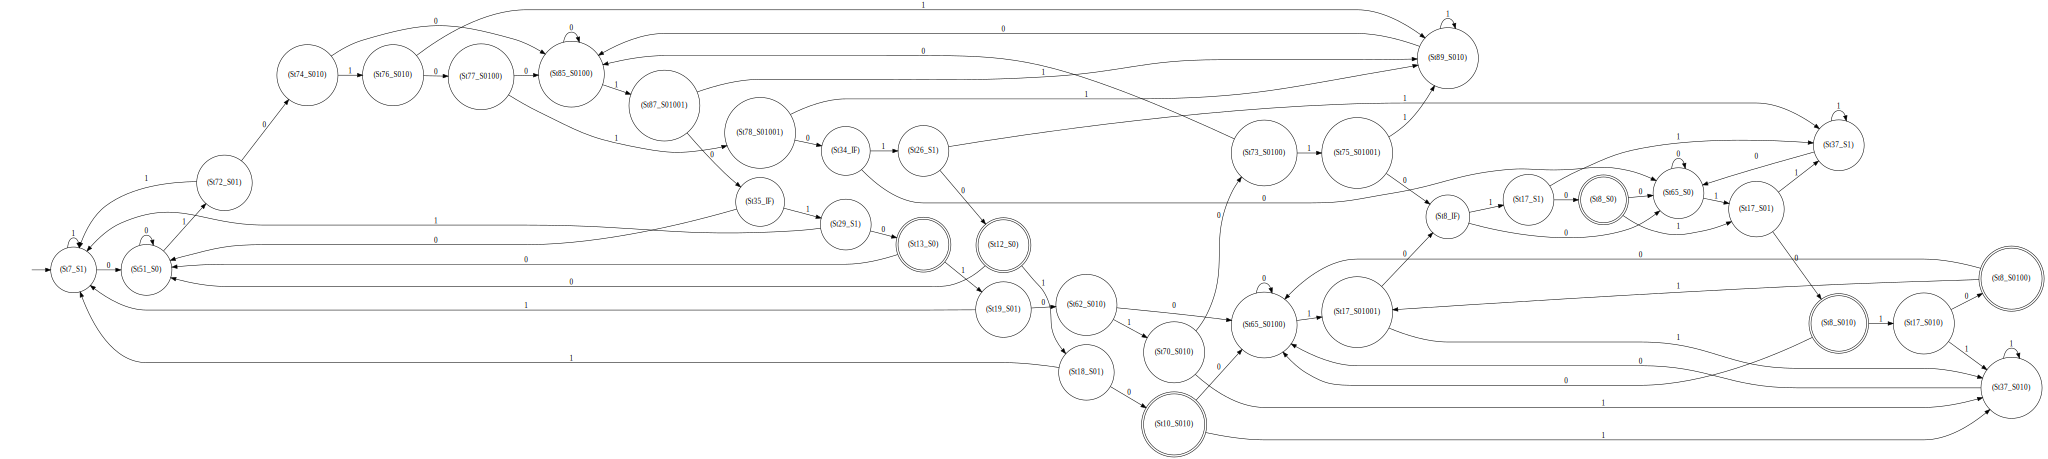

In [50]:
#-- Steps that list MissedDFA  are below
#-- 

dotObj_dfa(min_dfa(intersect_dfa(Correct010DFA, comp_dfa(Even010))))

# 1h(10 pts): Generate MissedDFA in steps below, and print it using dotObj_dfa. Then  run this DFA via numeric order enumeration and find out 10 strings present in this MissedDFA (that were missing in Even010 DFA).

# SOLUTION CELLS FOLLOW

In [51]:
#-- Steps that that tell us what was missed by Even010 DFA. What you missed must appear as a numeric order listing with five "Accept" strings (more is OK)

#-- 

# Question 2 (10 pts): Now, go back RegLang_Tutorial.ipynb . You see a "nfa1", "dfa1" and an "mdfa1" in it. Answer the question below wrt these DFA. The said items are reproduced below for your convenience.

In [52]:
nfa1 = md2mc('''
NFA

IF : '' | a -> A

A  : '' | b -> B

B  : ''     -> C

C  : '' | a -> IF

C  : a | c  -> D

D  : a      -> F

''')

Generating LALR tables


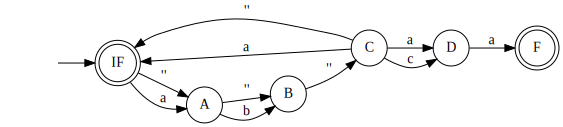

In [53]:
dotObj_nfa(nfa1)

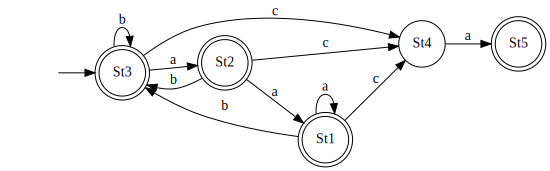

In [54]:
dfa1 = nfa2dfa(nfa1, STATENAME_MAXSIZE = 10)
dotObj_dfa(dfa1)

In [55]:
mdfa1 = min_dfa_brz(dfa1)

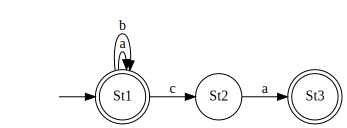

In [56]:
dotObj_dfa(mdfa1)

###  Explain why it is OK to leave some of the states in dfa1 (Original) to obtain mdfa1  (Minimized)

Here is how you must form your answer in the "Answer"" field below that you must submit:

* **Pick the first state**  in "Original - Minimized" (call it  __S1__). This is the first state in Original that is found missing in Minimized.  **Depending on how Python hashes, this first state may vary run-to-run. That is OK. Settle on one! **

  -- I settled on St4 that is missed!

* Now you want to argue that Minimized is still correct. Proceed as follows.

* Find the shortest string, w,  in numeric order that reached __S1__ in Original [ found that 'c' reaches St4 ]

* Find the state that the same string w reaches in Minimized. Call that __S2__ [ found that 'c' reaches St2]

* Since the DFA was correctly minimized, it must be the case that __S1__ and __S2__ are equivalent. Let us spot-check that this state equivalence holds. [ St4 and St2 must be equivalent ]

* Note down the states that  __S1__ reaches on a $0$ and a $1$, respectively. Call those states __S10__ and __S11__ .

* Note down the states that  __S2__ reaches on a $0$ and a $1$, respectively. Call those states __S20__ and __S21__ .

* It must be the case that __S10__ is accepting iff __S20__ is accepting. 

* Likewise, __S11__ is accepting iff __S21__ is accepting.

# SOLUTION CELLS FOLLOW

**Answer:**  Answer by editing these lines as per your machine:

* I find that state S1 [i.e. St4 ]  is in Original but is missing in Minimized (edit as necessary to put in the __actual__ state name that is found in the former but missing in the latter state.)

* I find that the shortest string, w, reaching S1 is w [..c...] : (edit-in the actual string, in place of string w)

* Now I find that the same w reaches state S2 in Minimized : (edit-in the actual state name in place of S2) [ ..St2.. ]

* Now upon 0, S1 goes to state S10 while S2 goes to S20, and they are both accepting/non-accepting:  (edit-in the actual states S10 and S20, and indicate whether they are both accepting---or they are both non-accepting)

* Upon a 1, S1 goes to S11 while S21 goes to S21 and they are both accepting/non-accepting:  (edit-in the actual states S11 and S21, and indicate whether they are both accepting---or they are both non-accepting)

* Thus I have spot-checked that the minimized machine is correctly produced.

* Upon an 'a'

  - St4 goes to St5 and that is accepting
  - St2 goes to St3 and that is accepting  

* Upon a 'b'
  - St4 goes to BH - nonaccepting
  - St2 goes to BH - nonaccepting

* Upon a 'c'
  - St4 goes to BH - nonaccepting
  - St2 goes to BH - nonaccepting


== ANSWER ==

So St4 and St2 seem to behave the same as far strings of length 1 go (they have the same 1-distinguishability markings)
 

# Question 3 (25 pts split as below): Explain the conversion of nfa1 to an RE. Use Jove commands. Eliminate states in the order A,B,C,D, IF,F. Obtain the final RE.  Verify that is the right RE by taking it, obtaining a minimal DFA, and then taking nfa1 to its own minimal DFA, and finally showing they are isomorphic.

# 3a (20 pts) : All the steps till obtaining the final RE are  to be shown below. You can of course use Jove to do this. But show the DO[1] , DO[2] , ..  printouts and explain each such step in 2 sentences

# SOLUTION CELLS FOLLOW

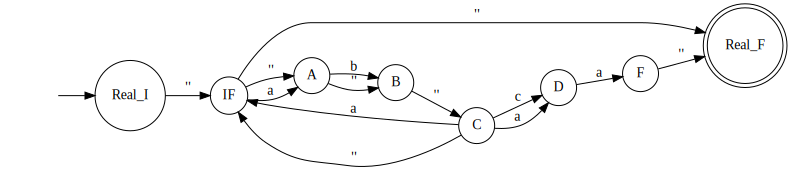

In [57]:
dotObj_nfa(nfa1)
gnfa1 = mk_gnfa(nfa1)
dotObj_gnfa(gnfa1)

In [58]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [59]:
DelList=['A','B','C','D','IF','F']
(Gf, DO, REfin) = del_gnfa_states(gnfa1, DelList)

**** Eliminating state A ****
**** Eliminating state B ****
**** Eliminating state C ****
**** Eliminating state D ****
**** Eliminating state IF ****
**** Eliminating state F ****


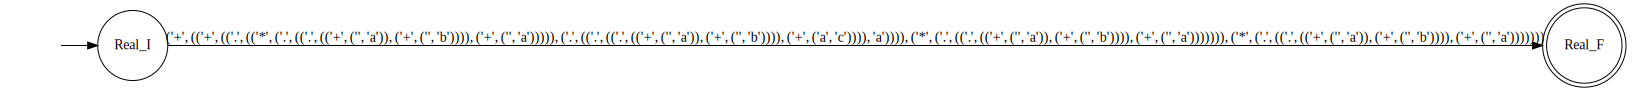

In [60]:
dotObj_gnfa(Gf)

In [61]:
REfin

'((((((("" + a) ("" + b)) ("" + a)))* (((("" + a) ("" + b)) (a + c)) a)) + (((("" + a) ("" + b)) ("" + a)))*) + (((("" + a) ("" + b)) ("" + a)))*)'

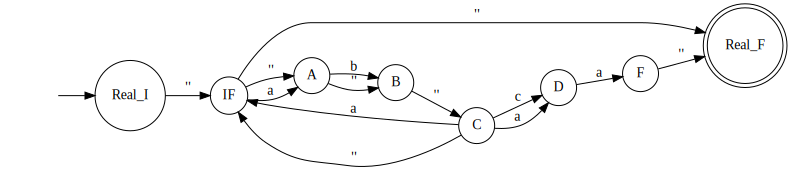

In [62]:
DO[0]

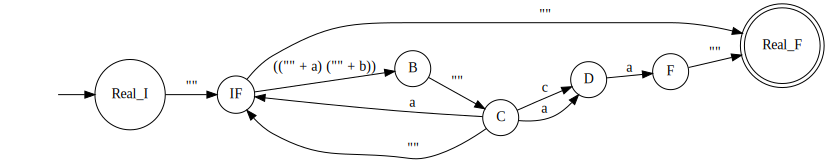

In [63]:
DO[1]

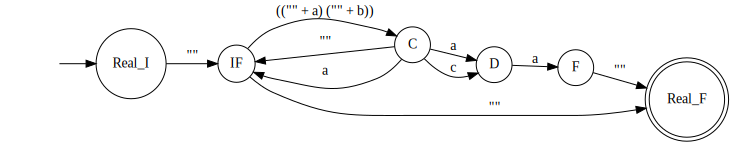

In [64]:
DO[2]

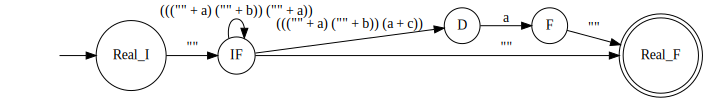

In [65]:
DO[3]

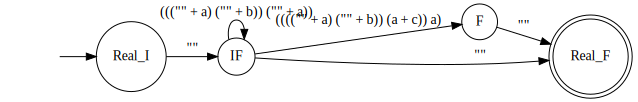

In [66]:
DO[4]

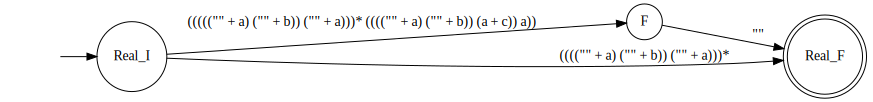

In [67]:
DO[5]

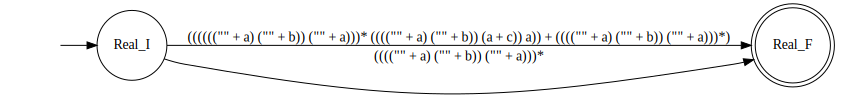

In [68]:
DO[6]

# 3b (30 pts): All the steps to verify as stated above, are to be provided below. Also double-check two derivations by hand and attach a scanned PNG inserted into the Jove notebook.

# * (5 of the 30 pts) Show the "C" state elimination - hand-check and include in your png. This is "C" deleted from original GNFA.

# * (5 of the 30 pts) Show the "IF" state elimination - show in your png. This is after the "C"-state elimination has been done.

# SOLUTION CELLS FOLLOW

# END